In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
from data_utils import data_reader

data_path = './data'
data_file = "治疗过程记录.xlsx"
output_path = './outputs'
data = data_reader(data_path,data_file,fill_na="")

data

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,specimen_code,item_group_name,item_code,item_name,result_quantitative,result_qualitative,result_unit,reference_range,reference_range_alert,report_date
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0031,葡萄糖[Glu],0.59,0.59,mmol/L,2.5-4.5,L,20220706
2,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0087,微量蛋白[MTP],2.02,2.02,g/L,0.15-0.45,H,20220706
3,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0095,蛋白定性,250,阳性(+),,,,20220706
4,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液常规(检),C0093,透明度,244,混浊,,,,20220706
5,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0093,透明度,244,混浊,,,,20220706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液常规(检),C0093,透明度,244,混浊,,,,20231128
8369,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液细胞学检查(检),C0100,多个核细胞百分比,70,70,%,,,20231128
8370,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0031,葡萄糖[Glu],2.70,2.70,mmol/L,2.5-4.5,,20231128
8371,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0087,微量蛋白[MTP],1.88,1.88,g/L,0.15-0.45,H,20231128


### 预处理时间序列

In [3]:
from data_utils import time_factor_processor
time_factor_df = time_factor_processor(data)      
time_factor_df

,mr_bah,脑脊液常规(检)-凝固性,脑脊液常规(检)-多个核细胞百分比,脑脊液常规(检)-微量蛋白[MTP],脑脊液常规(检)-氯[CL],脑脊液常规(检)-白细胞计数,脑脊液常规(检)-葡萄糖[Glu],脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-凝固性,...,脑脊液生化(检)-蛋白定性,脑脊液生化(检)-透明度,脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-微量蛋白[MTP],脑脊液细胞学检查(检)-氯[CL],脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
specimen_code,,,,,,,,,,,,,,,,,,,,,
2303060615,L0000900097,245.0,92.0,0,0,272,0,248.0,243,0,...,0,0,245.0,92.0,0,0,272,0,248.0,243
2303060616,L0000900097,0.0,0.0,0,0,0,0,0.0,0,0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2303090890,L0000900097,245.0,65.0,0,0,27,0,249.0,242,0,...,0,0,245.0,65.0,0,0,27,0,249.0,242
2303090891,L0000900097,0.0,0.0,0,0,0,0,0.0,0,0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2303130483,L0000900097,245.0,inf,0,0,3,0,248.0,242,0,...,0,0,245.0,inf,0,0,3,0,248.0,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312040400,L0001185394,0.0,0.0,0,0,0,0,0.0,0,0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2311191834,L0001185712,0.0,0.0,0,0,0,0,0.0,0,0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2311191835,L0001185712,245.0,24.0,0,0,39,0,248.0,242,0,...,0,0,245.0,24.0,0,0,39,0,248.0,242


In [4]:
time_path = os.path.join(output_path,"time_factor.csv")
time_factor_df.to_csv(time_path)

### 分离感染者和未感染者

In [5]:
print(len(pd.unique(data['mr_bah'])))

191


In [6]:
from data_utils import Infector_chooser

rows_with_infection, rows_without_infection = Infector_chooser(data)
# 筛选出感染者和未感染者住院号
admission_num_infection = pd.unique(rows_with_infection['mr_bah'])
admission_num_noninfection = pd.unique(rows_without_infection['mr_bah'])

In [7]:
# 筛选出时间序列中的感染记录和未感染记录
infection_mask = np.isin(time_factor_df['mr_bah'],admission_num_infection)
time_factor_infection = time_factor_df[infection_mask]
time_factor_noninfection = time_factor_df[~infection_mask]

In [8]:
print(len(admission_num_infection))
print(len(admission_num_noninfection))

34
157


### 数据检验

#### 常规检查

In [9]:
df_infection = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] !=0]
duplicated_mask = ~df_infection.duplicated(subset=['mr_bah'], keep='first')  # 筛选出第一次检查
df_infection = df_infection[duplicated_mask]
df_infection.describe()

,脑脊液常规(检)-凝固性,脑脊液常规(检)-多个核细胞百分比,脑脊液常规(检)-微量蛋白[MTP],脑脊液常规(检)-氯[CL],脑脊液常规(检)-白细胞计数,脑脊液常规(检)-葡萄糖[Glu],脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-凝固性,脑脊液生化(检)-多个核细胞百分比,...,脑脊液生化(检)-蛋白定性,脑脊液生化(检)-透明度,脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-微量蛋白[MTP],脑脊液细胞学检查(检)-氯[CL],脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
count,34.000000,34.00,34.0,34.0,34.000000,34.0,34.000000,34.000000,34.0,34.0,...,34.0,34.0,34.000000,34.00,34.0,34.0,34.000000,34.0,34.000000,34.000000
mean,245.117647,inf,0.0,0.0,1885.911765,0.0,248.882353,243.058824,0.0,0.0,...,0.0,0.0,216.264706,inf,0.0,0.0,1837.676471,0.0,219.647059,214.500000
std,0.327035,NaN,0.0,0.0,3470.247396,0.0,0.913359,0.850710,0.0,0.0,...,0.0,0.0,80.156782,NaN,0.0,0.0,3489.351053,0.0,81.414347,79.506146
min,245.000000,10.00,0.0,0.0,1.000000,0.0,248.000000,242.000000,0.0,0.0,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,245.000000,74.25,0.0,0.0,33.000000,0.0,248.000000,242.000000,0.0,0.0,...,0.0,0.0,245.000000,56.25,0.0,0.0,16.500000,0.0,248.000000,242.000000
50%,245.000000,86.50,0.0,0.0,342.500000,0.0,249.000000,243.000000,0.0,0.0,...,0.0,0.0,245.000000,84.50,0.0,0.0,151.000000,0.0,248.500000,243.000000
75%,245.000000,92.75,0.0,0.0,1808.250000,0.0,250.000000,244.000000,0.0,0.0,...,0.0,0.0,245.000000,88.00,0.0,0.0,1808.250000,0.0,250.000000,244.000000
max,246.000000,inf,0.0,0.0,16132.000000,0.0,250.000000,244.000000,0.0,0.0,...,0.0,0.0,246.000000,inf,0.0,0.0,16132.000000,0.0,250.000000,244.000000


In [10]:
df_noninfection = time_factor_noninfection[time_factor_noninfection['脑脊液常规(检)-凝固性'] !=0]
duplicated_mask = ~df_noninfection.duplicated(subset=['mr_bah'], keep='first')
df_noninfection = df_noninfection[duplicated_mask]
df_noninfection.describe()

C:\Users\hasaki\miniconda3\envs\DL\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\hasaki\miniconda3\envs\DL\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,脑脊液常规(检)-凝固性,脑脊液常规(检)-多个核细胞百分比,脑脊液常规(检)-微量蛋白[MTP],脑脊液常规(检)-氯[CL],脑脊液常规(检)-白细胞计数,脑脊液常规(检)-葡萄糖[Glu],脑脊液常规(检)-蛋白定性,脑脊液常规(检)-透明度,脑脊液生化(检)-凝固性,脑脊液生化(检)-多个核细胞百分比,...,脑脊液生化(检)-蛋白定性,脑脊液生化(检)-透明度,脑脊液细胞学检查(检)-凝固性,脑脊液细胞学检查(检)-多个核细胞百分比,脑脊液细胞学检查(检)-微量蛋白[MTP],脑脊液细胞学检查(检)-氯[CL],脑脊液细胞学检查(检)-白细胞计数,脑脊液细胞学检查(检)-葡萄糖[Glu],脑脊液细胞学检查(检)-蛋白定性,脑脊液细胞学检查(检)-透明度
count,157.000000,157.0,157.0,157.0,157.000000,157.0,157.000000,157.000000,157.0,157.0,...,157.0,157.0,157.000000,157.0,157.0,157.0,157.000000,157.0,157.000000,157.000000
mean,245.095541,inf,0.0,0.0,1235.503185,0.0,248.675159,242.923567,0.0,0.0,...,0.0,0.0,221.656051,inf,0.0,0.0,1136.636943,0.0,224.840764,219.675159
std,0.315892,NaN,0.0,0.0,8647.849914,0.0,0.871313,0.858901,0.0,0.0,...,0.0,0.0,72.272163,NaN,0.0,0.0,8641.046035,0.0,73.314436,71.630392
min,245.000000,1.0,0.0,0.0,0.000000,0.0,248.000000,242.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,245.000000,56.0,0.0,0.0,6.000000,0.0,248.000000,242.000000,0.0,0.0,...,0.0,0.0,245.000000,46.0,0.0,0.0,3.000000,0.0,248.000000,242.000000
50%,245.000000,83.0,0.0,0.0,40.000000,0.0,248.000000,243.000000,0.0,0.0,...,0.0,0.0,245.000000,81.0,0.0,0.0,27.000000,0.0,248.000000,243.000000
75%,245.000000,NaN,0.0,0.0,379.000000,0.0,250.000000,244.000000,0.0,0.0,...,0.0,0.0,245.000000,NaN,0.0,0.0,266.000000,0.0,249.000000,244.000000
max,247.000000,inf,0.0,0.0,107270.000000,0.0,250.000000,244.000000,0.0,0.0,...,0.0,0.0,246.000000,inf,0.0,0.0,107270.000000,0.0,250.000000,244.000000


In [11]:
np_infection = df_infection.to_numpy()
np_noninfection = df_noninfection.to_numpy()
np_infection[:,2:].mean(0), np_noninfection[:,2:].mean(0)

(array([inf, 0.0, 0.0, 1885.9117647058824, 0.0, 248.88235294117646,
        243.05882352941177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        216.26470588235293, inf, 0.0, 0.0, 1837.6764705882354, 0.0,
        219.64705882352942, 214.5], dtype=object),
 array([inf, 0.0, 0.0, 1235.5031847133757, 0.0, 248.6751592356688,
        242.9235668789809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        221.656050955414, inf, 0.0, 0.0, 1136.6369426751592, 0.0,
        224.84076433121018, 219.6751592356688], dtype=object))

#### 生化检查

In [12]:
_df_infection = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] ==0]
duplicated_mask = ~_df_infection.duplicated(subset=['mr_bah'], keep='first')  # 筛选出第一次检查
_df_infection = _df_infection[duplicated_mask]
_df_infection.describe().iloc[:,10:14]

,脑脊液生化(检)-微量蛋白[MTP],脑脊液生化(检)-氯[CL],脑脊液生化(检)-白细胞计数,脑脊液生化(检)-葡萄糖[Glu]
count,34.000000,34.000000,34.0,34.000000
mean,2.002353,117.094118,0.0,3.968235
std,1.739082,22.095426,0.0,2.750241
min,0.090000,0.000000,0.0,0.020000
25%,0.595000,115.800000,0.0,2.357500
50%,1.560000,121.800000,0.0,3.285000
75%,2.377500,124.175000,0.0,4.812500
max,6.620000,142.200000,0.0,13.820000


In [13]:
_df_noninfection = time_factor_noninfection[time_factor_noninfection['脑脊液常规(检)-凝固性'] ==0]
duplicated_mask = ~_df_noninfection.duplicated(subset=['mr_bah'], keep='first')
_df_noninfection = _df_noninfection[duplicated_mask]
_df_noninfection.describe().iloc[:,10:14]

,脑脊液生化(检)-微量蛋白[MTP],脑脊液生化(检)-氯[CL],脑脊液生化(检)-白细胞计数,脑脊液生化(检)-葡萄糖[Glu]
count,157.000000,157.000000,157.0,157.000000
mean,1.238025,124.952229,0.0,3.855605
std,2.626725,7.709448,0.0,1.916110
min,0.090000,86.200000,0.0,0.000000
25%,0.440000,121.500000,0.0,2.850000
50%,0.660000,124.800000,0.0,3.460000
75%,1.100000,128.500000,0.0,4.270000
max,30.710000,155.900000,0.0,14.480000


In [14]:
np_infection = _df_infection.to_numpy()
np_noninfection = _df_noninfection.to_numpy()

print(np_infection)
np_infection[:,2:].mean(0), np_noninfection[:,2:].mean(0)

[['L0000903157' 0.0 0.0 0 0 0 0 0.0 0 0 0 1.77 119.2 0 4.06 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0000996807' 0.0 0.0 0 0 0 0 0.0 0 0 0 0.36 128.1 0 4.94 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001079804' 0.0 0.0 0 0 0 0 0.0 0 0 0 6.19 115.8 0 3.21 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001106901' 0.0 0.0 0 0 0 0 0.0 0 0 0 6.62 106.6 0 0.02 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001110255' 0.0 0.0 0 0 0 0 0.0 0 0 0 2.02 0.0 0 0.59 0 0 0.0 0.0 0 0
  0 0 0.0 0]
 ['L0001118051' 0.0 0.0 0 0 0 0 0.0 0 0 0 4.36 121.9 0 13.82 0 0 0.0 0.0
  0 0 0 0 0.0 0]
 ['L0001121508' 0.0 0.0 0 0 0 0 0.0 0 0 0 4.64 134.7 0 3.36 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001125144' 0.0 0.0 0 0 0 0 0.0 0 0 0 0.56 125.0 0 3.1 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001129332' 0.0 0.0 0 0 0 0 0.0 0 0 0 1.2 109.5 0 0.59 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001129840' 0.0 0.0 0 0 0 0 0.0 0 0 0 1.35 122.6 0 1.8 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001130295' 0.0 0.0 0 0 0 0 0.0 0 0 0 3.52 120.2 0 1.34 0 0 0.0 0.0 0
  0 0 0 0.0 0]
 ['L0001135640' 0.0 0.0 0

(array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.002352941176471,
        117.09411764705885, 0.0, 3.9682352941176475, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2380254777070063,
        124.95222929936304, 0.0, 3.8556050955414016, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object))

### 感染者 脑脊液常规(检)-白细胞计数 治疗移动倾向

In [23]:
def trend_plot(df,col_name='脑脊液常规(检)-白细胞计数',title=""):
    df_to_loop = df[['mr_bah',col_name]]
    df_to_plots = []
    while len(df_to_loop)> 0:
        duplicated_mask = ~df_to_loop.duplicated(subset=['mr_bah'], keep='first')
        df_to_plot = df_to_loop[duplicated_mask][col_name]
        df_to_plots.append(df_to_plot)
        df_to_loop = df_to_loop[~duplicated_mask]
    
    # 颜色列表
    colors = plt.cm.viridis(np.linspace(0, 1, len(df_to_plots)))

    # 创建散点图
    plt.figure(figsize=(10, 6))

    for i in range(len(df_to_plots)):
        x = np.ones(len(df_to_plots[i])) * i
        y = df_to_plots[i]
#         plt.scatter(x, y, color=colors[i], label=f'第 {i+1} 次采样')
        plt.scatter(x, y, color=colors[i])

    # 添加图例和标题
    plt.legend()
    plt.title(title)
    plt.xlabel('采样次数')
    plt.ylabel(col_name)
    plt.ylim(0, 2400)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


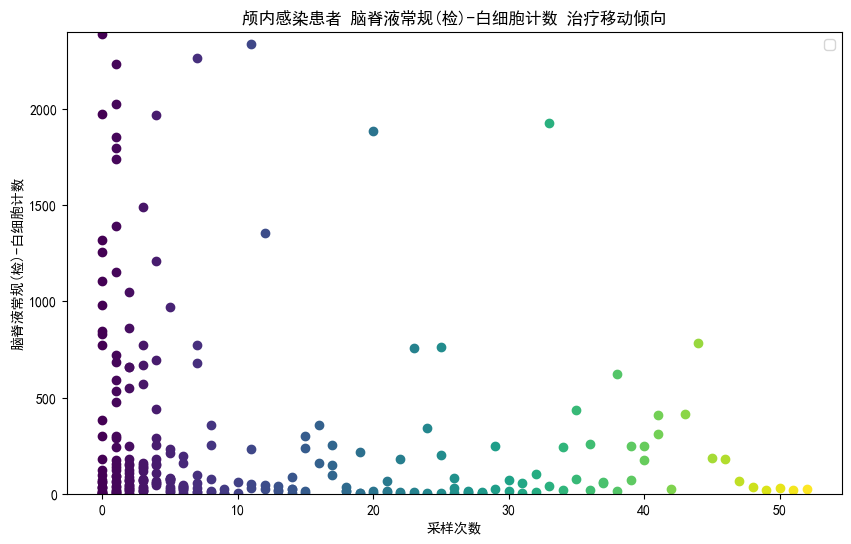

In [24]:
df_infection = time_factor_infection[time_factor_infection['脑脊液常规(检)-凝固性'] !=0]
trend_plot(df_infection,title="颅内感染患者 脑脊液常规(检)-白细胞计数 治疗移动倾向")

### 非感染者 脑脊液常规(检)-白细胞计数 治疗移动倾向

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


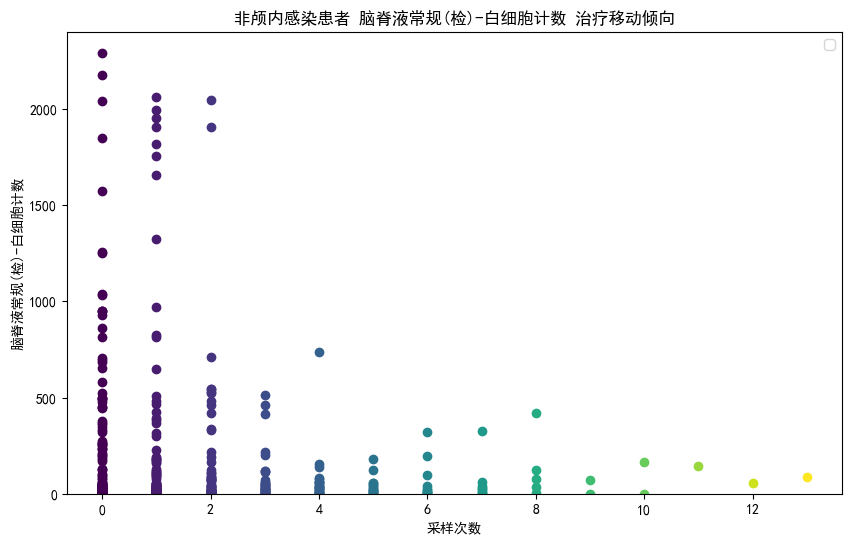

In [25]:
df_noninfection = time_factor_noninfection[time_factor_noninfection['脑脊液常规(检)-凝固性'] !=0]
trend_plot(df_noninfection,title="非颅内感染患者 脑脊液常规(检)-白细胞计数 治疗移动倾向")

## 标准分数 (z-score) 方法
通过生化指标，推断是否发生颅内感染

In [18]:
u1_mean = df_noninfection.iloc[:,5].mean()
v1_std = df_noninfection.iloc[:,5].std()
print(u1_mean,v1_std)

758.7907542579076 5630.876906106114


In [19]:
from data_utils import patient_splitter
indicators = ['mr_bah', 'mr_xb', 'mr_nn', 'mr_sjzyts', 'mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10']

Patients = patient_splitter(data,indicators=indicators)
Patients.set_index(Patients.columns[0], inplace=True)

selected_columns1 = df_infection.iloc[:, [0, 5, -4]]
selected_columns1.set_index(selected_columns1.columns[0], inplace=True)

selected_columns2= df_noninfection.iloc[:, [0, 5, -4]]
selected_columns2.set_index(selected_columns2.columns[0], inplace=True)

selected_columns=pd.concat([selected_columns1, selected_columns2], axis=0)

res_df = pd.merge(Patients, selected_columns, left_index=True, right_index=True)
res_df

,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,mr_cyqtzdmc6,mr_cyqtzdmc7,mr_cyqtzdmc8,mr_cyqtzdmc9,mr_cyqtzdmc10,脑脊液常规(检)-白细胞计数,脑脊液细胞学检查(检)-白细胞计数
mr_bah,,,,,,,,,,,,,,,,
L0000900097,2,62岁,30,垂体瘤,慢性硬膜下血肿,锁骨下动脉斑块,脑脊液鼻漏,,,,,,,,272,272
L0000900097,2,62岁,30,垂体瘤,慢性硬膜下血肿,锁骨下动脉斑块,脑脊液鼻漏,,,,,,,,27,27
L0000900097,2,62岁,30,垂体瘤,慢性硬膜下血肿,锁骨下动脉斑块,脑脊液鼻漏,,,,,,,,3,3
L0000900097,2,62岁,30,垂体瘤,慢性硬膜下血肿,锁骨下动脉斑块,脑脊液鼻漏,,,,,,,,217,217
L0000900097,2,62岁,30,垂体瘤,慢性硬膜下血肿,锁骨下动脉斑块,脑脊液鼻漏,,,,,,,,138,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L0001184723,2,44岁,18,脑动脉瘤破裂伴蛛网膜下腔出血,高血压病3级（高危）,,,,,,,,,,20,20
L0001185049,2,51岁,14,面肌痉挛,颅内感染,,,,,,,,,,61,61
L0001185394,2,56岁,21,脑室出血,肺部感染,呼吸衰竭,高血压病3级（极高危）,腔隙性脑梗死,腰椎骨质增生,电解质紊乱,,,,,265,265


In [20]:
pro_indicators = ['外展神经损伤', '脑室腹腔分流管置入感染', '脑实质出血继发蛛网膜下腔出血', '额叶交界性肿瘤', '面肌痉挛', '手术后切口愈合不良', '手术后脑脊液漏', '三叉神经痛', '手术后颅内积气', '低钠血症', '多发性大脑挫裂伤']
v_out = []
                
for indicator in pro_indicators:
    n = 0
    v = 0
    # 遍历 df 中的每一行
    for index, row in res_df.iterrows():
        # 检查当前行是否包含 indicator
        if indicator in row.values:
            # 取出这一行的倒数第二列的值
            value = row.iloc[-2]
            v += value-u1_mean/v1_std
            n += 1
    if n<2:
        v_out.append(0)
    else:
        v_out.append(v/n)
            
res_dict = dict(zip(pro_indicators, v_out))
# 打印字典中的键值对
for key, value in res_dict.items():
    print(f"{key}: {value}")


外展神经损伤: 429.3652446560436
脑室腹腔分流管置入感染: 550.2436230344224
脑实质出血继发蛛网膜下腔出血: 726.6777446560442
额叶交界性肿瘤: 452.5319113227103
面肌痉挛: 459.4718020330933
手术后切口愈合不良: 349.79381608461506
手术后脑脊液漏: 47.86524465604371
三叉神经痛: 650.9485779893774
手术后颅内积气: 618.6652446560436
低钠血症: 293.53191132271036
多发性大脑挫裂伤: 1329.444954800972
